In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

### Importing and creating dataframes

In [2]:
customers = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Retail Case Study/Customer.csv')
transactions = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Retail Case Study/Transactions.csv')
product_hierarchy = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Retail Case Study/prod_cat_info.csv')

### Metadata Inspection

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [5]:
product_hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


### UDFs

In [6]:
def continuous_var_summary(x):
    return pd.Series([x.min(), x.quantile(0.25),x.quantile(0.50), x.quantile(0.75), x.max()],
                     index=['min', 'Q1', 'Median', 'Q3', 'max'])

In [7]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

### Data Preparation

In [8]:
#Renaming columns for merging datasets
transactions.rename(columns={'cust_id':'customer_Id'}, inplace= True)
product_hierarchy.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)

### 1) Merging the dataset to include all the customers who have done transactions

In [9]:
joined_data = pd.merge(how = 'right', left = customers, right = transactions, on = 'customer_Id')

In [10]:
Customer_Final = pd.merge(how = 'left', left = joined_data, right = product_hierarchy, on = ['prod_cat_code','prod_subcat_code'])

In [11]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270384,11-05-1973,F,8.0,29258453508,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,273420,27-07-1992,M,8.0,51750724947,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,271509,08-06-1981,M,3.0,93274880719,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,273420,27-07-1992,M,8.0,51750724947,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,274550,21-02-1972,M,7.0,94340757522,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,270022,27-04-1984,M,9.0,89780862956,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,271020,20-06-1976,M,8.0,85115299378,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,270911,22-05-1970,M,2.0,72870271171,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [12]:
#Identifying duplicates values and downloading in excel for the future reference
Customer_Final[Customer_Final.duplicated(keep=False)].to_excel('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Retail Case Study/duplicates.xlsx')

In [13]:
#Dropping duplicate observations
Customer_Final.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [14]:
#Converting the 'DOB' column to a 'datetime' format
Customer_Final['DOB'] = pd.to_datetime(Customer_Final.DOB, format='%d-%m-%Y')

In [15]:
#Converting the 'tran_date' column to a 'datetime' format
Customer_Final['tran_date'] = Customer_Final.tran_date.str.replace('/', '-')

In [16]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final.tran_date, format='%d-%m-%Y')

In [17]:
#Missing value imputation:
Customer_Final = Customer_Final.fillna(Customer_Final.mode().iloc[0])

### 2) Summary Report

#### a) Column names and their corresponding data types:

In [18]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23040 entries, 0 to 23039
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23040 non-null  int64         
 1   DOB               23040 non-null  datetime64[ns]
 2   Gender            23040 non-null  object        
 3   city_code         23040 non-null  float64       
 4   transaction_id    23040 non-null  int64         
 5   tran_date         23040 non-null  datetime64[ns]
 6   prod_subcat_code  23040 non-null  int64         
 7   prod_cat_code     23040 non-null  int64         
 8   Qty               23040 non-null  int64         
 9   Rate              23040 non-null  int64         
 10  Tax               23040 non-null  float64       
 11  total_amt         23040 non-null  float64       
 12  Store_type        23040 non-null  object        
 13  prod_cat          23040 non-null  object        
 14  prod_subcat       2304

#### b) Top/Bottom 10 observations

In [19]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270384,1973-05-11,F,8.0,29258453508,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,273420,1992-07-27,M,8.0,51750724947,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,271509,1981-06-08,M,3.0,93274880719,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,273420,1992-07-27,M,8.0,51750724947,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
5,272357,1982-10-09,F,6.0,97439039119,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances
6,273667,1981-05-29,M,9.0,45649838090,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath
7,271489,1971-04-21,M,9.0,22643667930,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools
8,275108,1971-11-04,F,8.0,79792372943,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids
9,269014,1979-11-27,F,3.0,50076728598,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances


In [20]:
#Bottom 10 observations
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23030,271982,1976-08-10,M,8.0,49882891062,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction
23031,273982,1991-10-12,M,4.0,14787475597,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles
23032,273031,1980-01-17,F,8.0,50691119572,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY
23033,272049,1975-06-28,F,6.0,40893803228,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath
23034,266866,1974-04-18,M,4.0,30856003613,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids
23035,274550,1972-02-21,M,7.0,94340757522,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23036,270022,1984-04-27,M,9.0,89780862956,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23037,271020,1976-06-20,M,8.0,85115299378,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23038,270911,1970-05-22,M,2.0,72870271171,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children
23039,271961,1982-01-15,M,1.0,77960931771,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children


#### c) “Five-number summary” for continuous variables

In [21]:
#Five-Point Summary for continuous variables (min, Q1, median, Q3, max)
Customer_Final.select_dtypes(['int64', 'float64' ]).apply(lambda x: continuous_var_summary(x))

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
min,266783.00,1.0,3.268991e+06,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925
Q1,268935.00,3.0,2.493315e+10,3.0,2.0,1.0,312.0,98.2800,762.450
Median,270980.50,5.0,5.009188e+10,5.0,4.0,3.0,710.0,199.0800,1756.950
Q3,273114.25,8.0,7.532632e+10,10.0,5.0,4.0,1109.0,365.7675,3570.255
max,275265.00,10.0,9.998755e+10,12.0,6.0,5.0,1500.0,787.5000,8287.500


#### d) Frequency Table for all the categorical variable

In [22]:
Customer_Final.select_dtypes('object').apply(lambda x: categorical_var_summary(x))

,Gender,Store_type,prod_cat,prod_subcat
N,23040,23040,23040,23040
NMISS,0,0,0,0
MODE,M,e-Shop,Books,Women
FREQ,11813,9304,6066,3046
PERCENT,51.27,40.38,26.33,13.22


In [23]:
#Method 2: The easy way for getting frequency for categorical variables
Customer_Final.describe(include='object')

,Gender,Store_type,prod_cat,prod_subcat
count,23040,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11813,9304,6066,3046


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from matplotlib import rcParams

In [26]:
#Saving continuous and categorical variables separately
cont_var = Customer_Final.select_dtypes(['int64', 'float64' ])
cat_var = Customer_Final.select_dtypes('object')

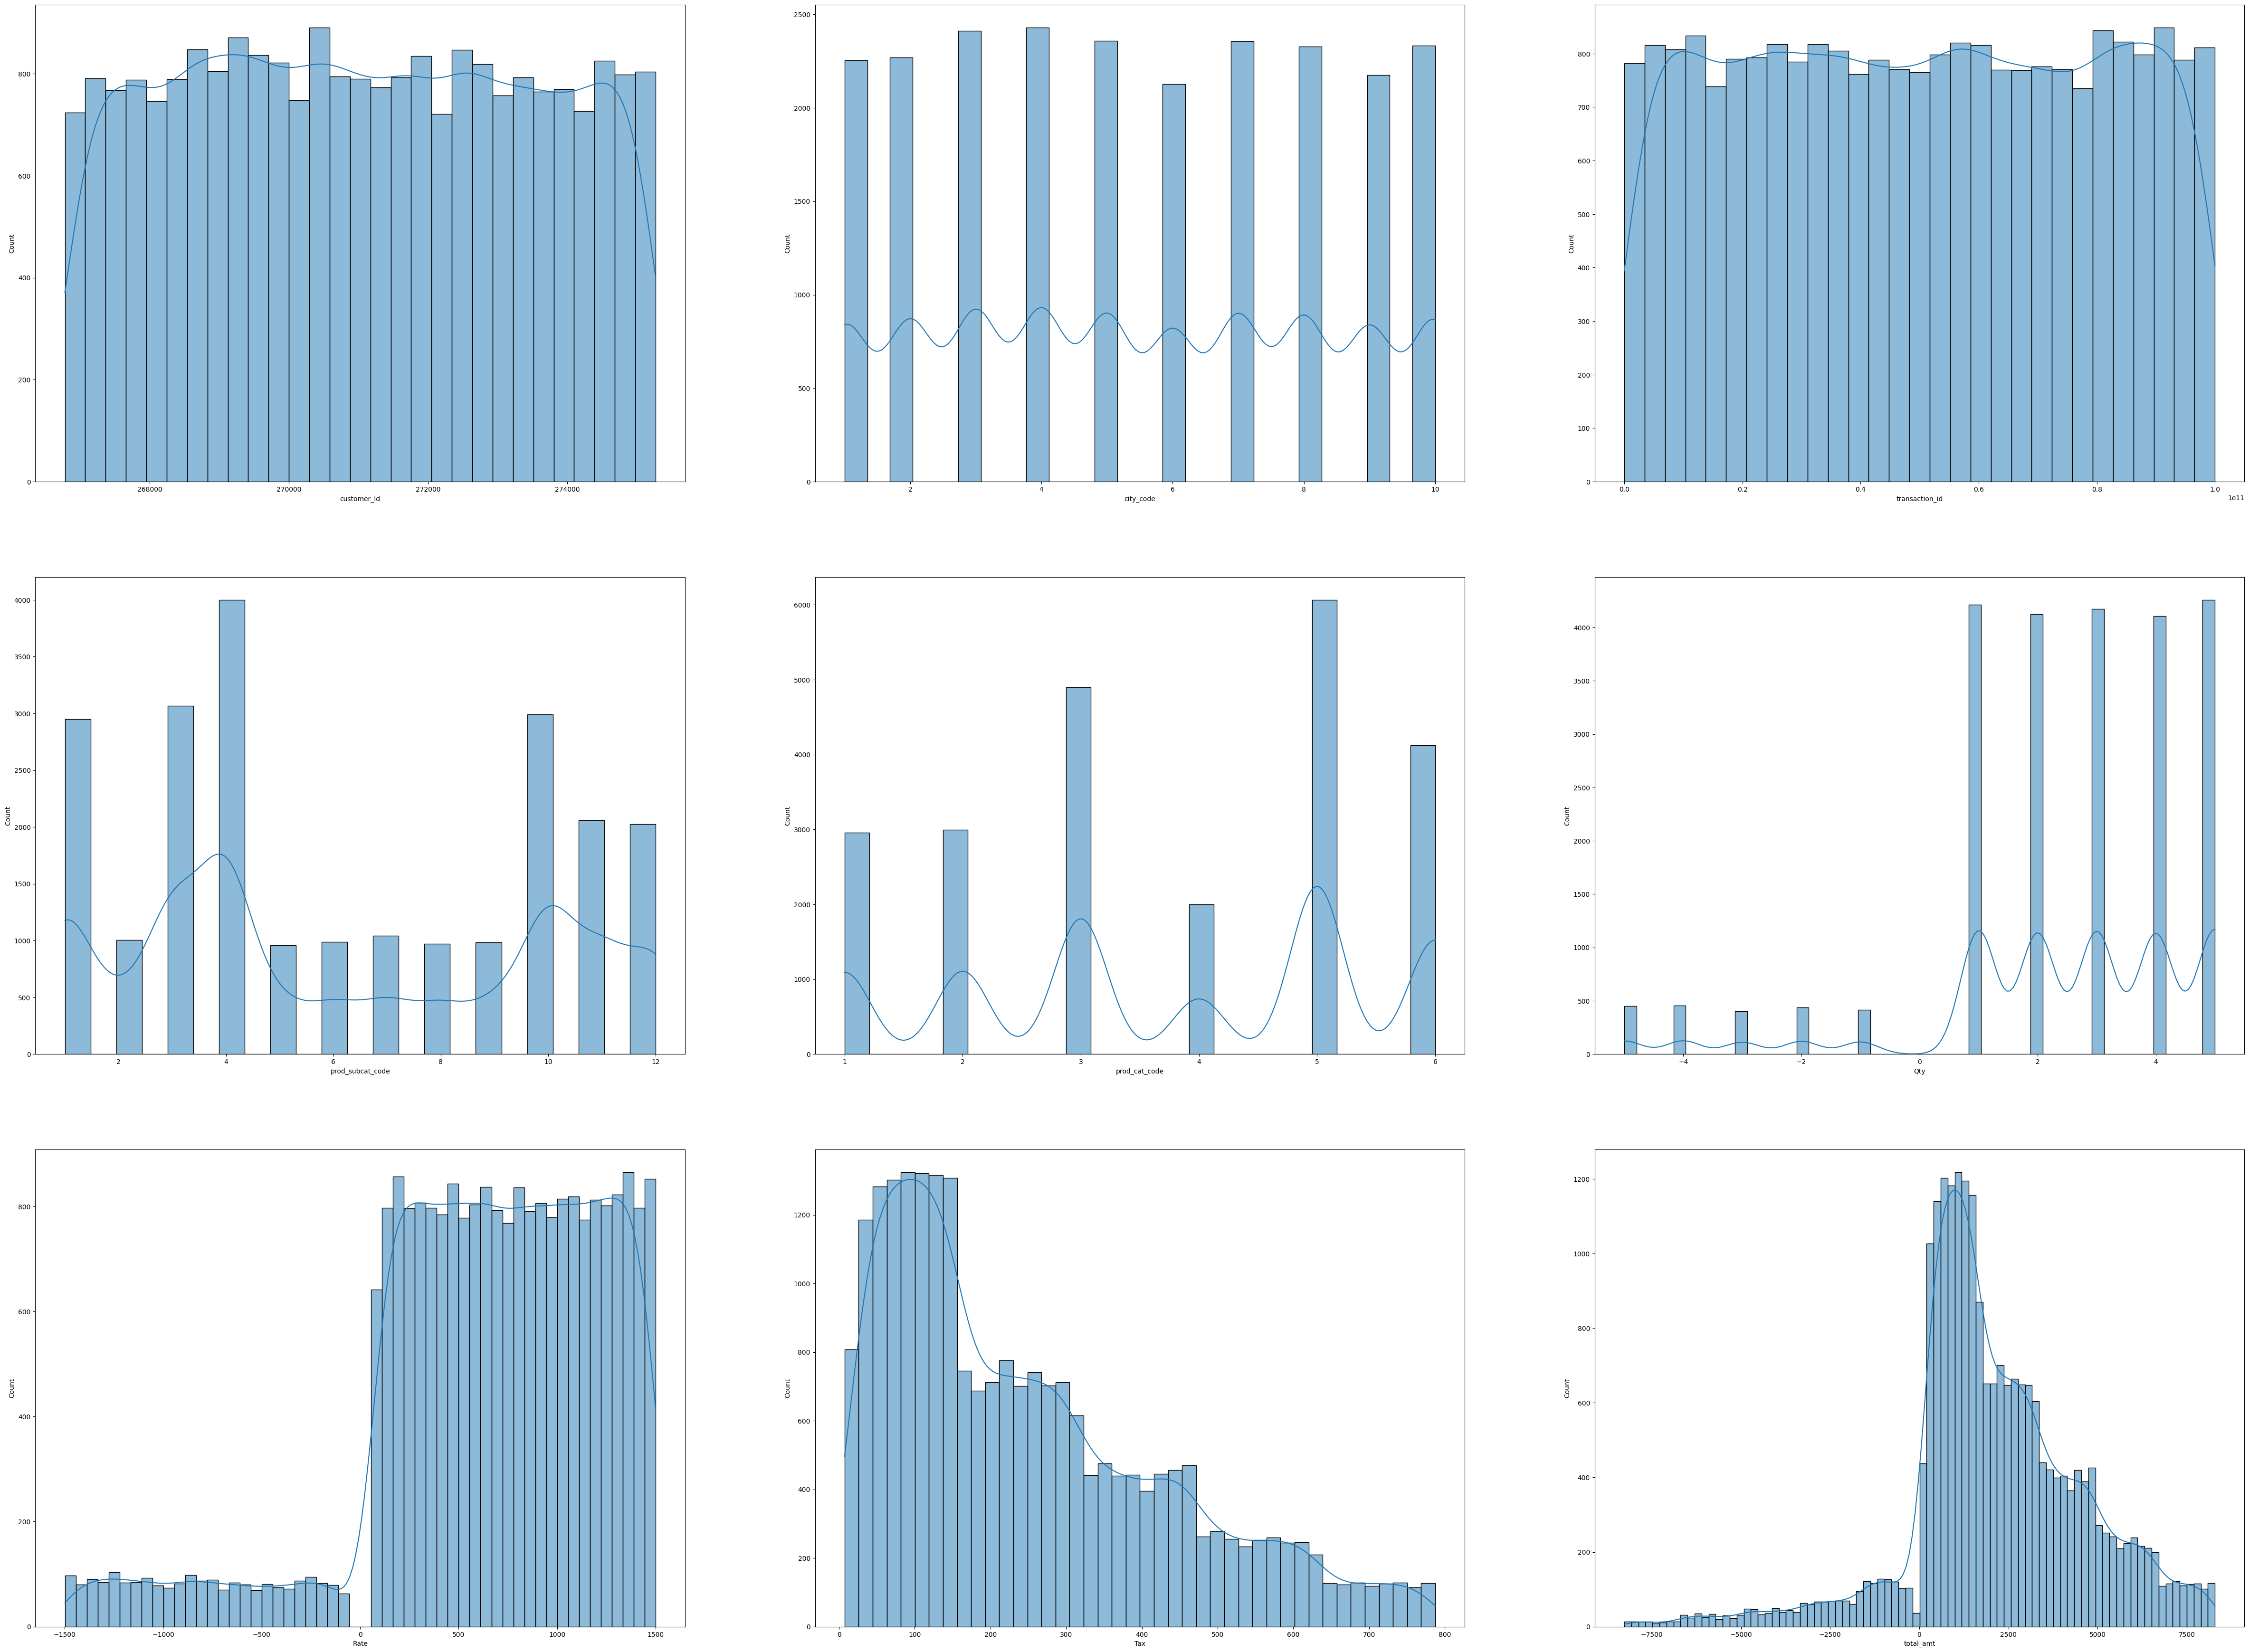

In [27]:
#Histogram for Continuous Variable
rcParams['figure.figsize'] = 60, 60
for i in list(enumerate(cont_var.columns)):
    plt.subplot(4, 3, i[0]+1)
    sns.histplot(data = cont_var[i[1]], kde=True)
plt.show()

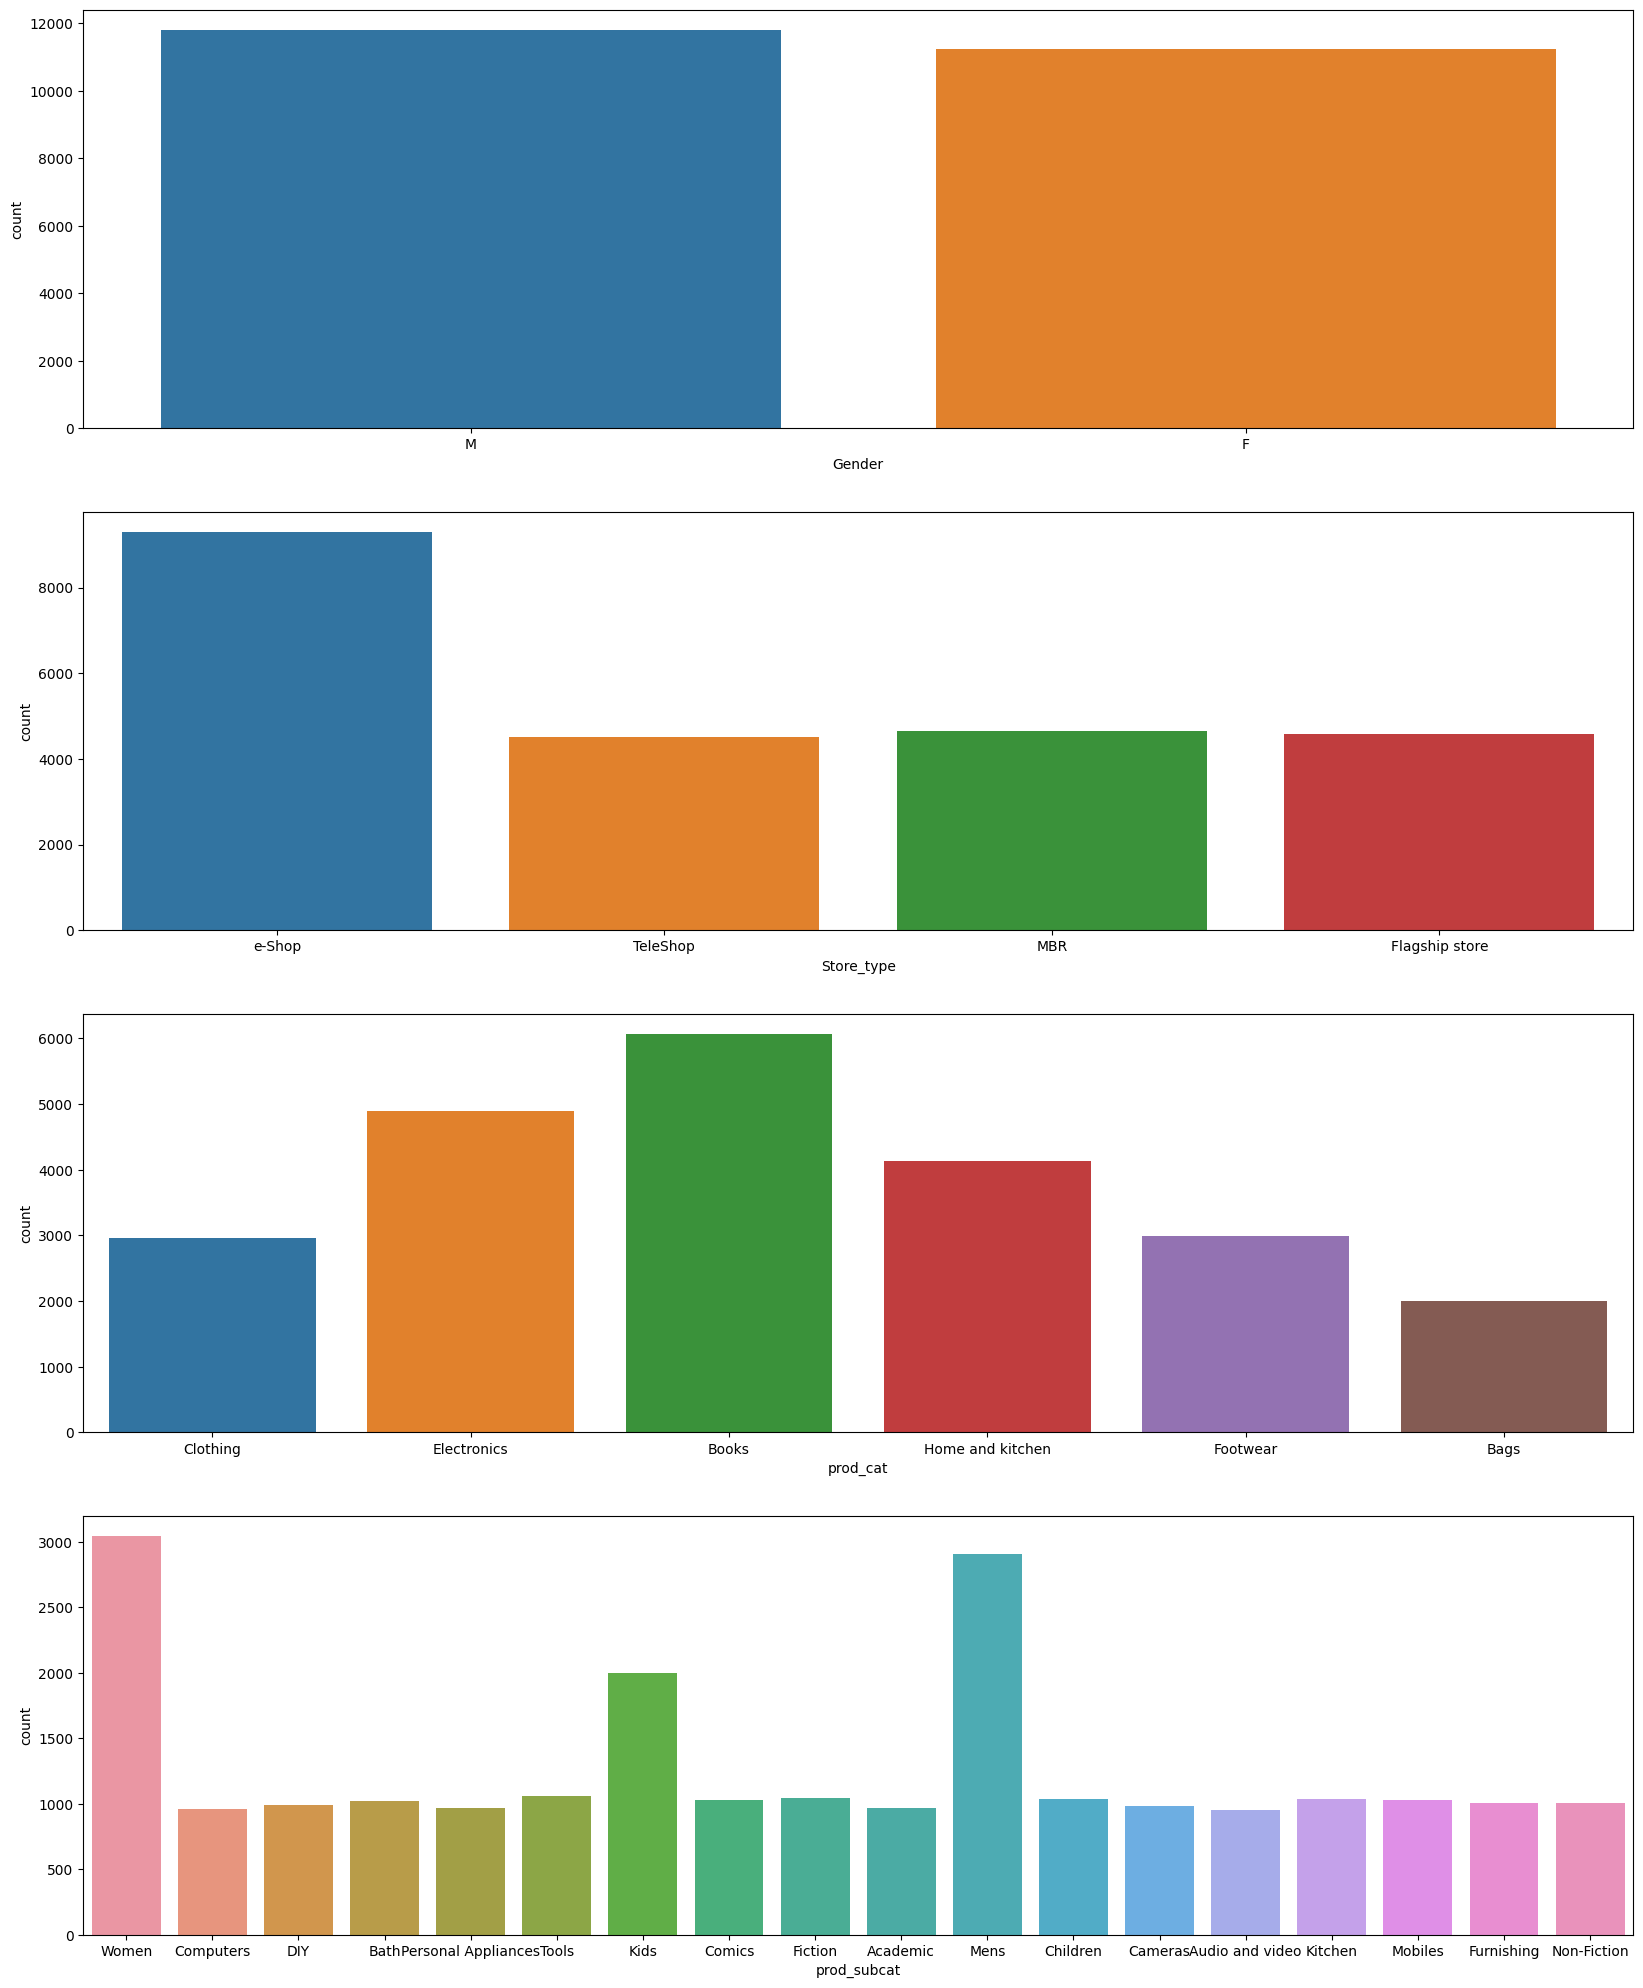

In [28]:
#Frequency plot for Categorical variable
rcParams['figure.figsize'] = 20, 25
for i in list(enumerate(cat_var.columns)):
    plt.subplot(4, 1, i[0]+1)
    sns.countplot(data=cat_var, x=cat_var[i[1]])  
plt.show()

### 4) Calculated Variables

#### a) Time period of the available transactions data

In [29]:
#Finding out the first date in the dataset
trans_min = Customer_Final.tran_date.min()
trans_max = Customer_Final.tran_date.max()

In [30]:
time_delta = trans_max - trans_min
print(time_delta)

1130 days 00:00:00


#### b) Count of transactions where the total amount of transaction was negative

In [31]:
negative_transaction_amount = Customer_Final.loc[Customer_Final.total_amt<0, 'transaction_id'].count()
print(negative_transaction_amount)

2164


### 5) Analysis of popular product categories among female and male customers

In [32]:
pop_cat = pd.crosstab(index= Customer_Final.Gender, columns= Customer_Final.prod_cat)
pop_cat

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2328,1528,1993
M,1004,3120,1521,2567,1468,2133


<AxesSubplot: xlabel='Gender'>

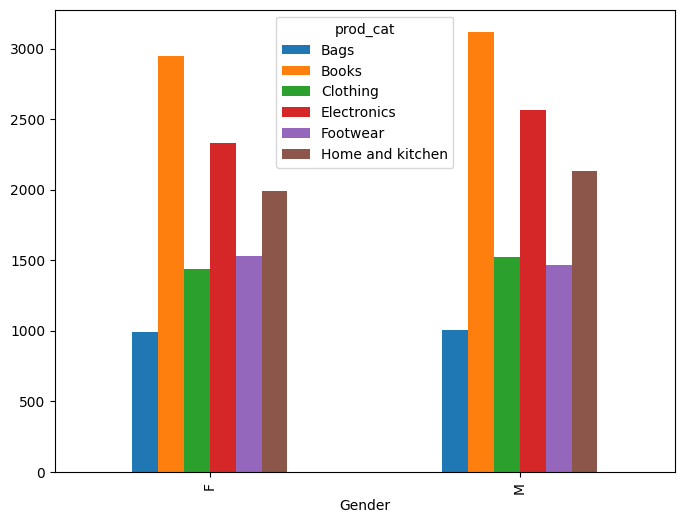

In [33]:
pop_cat.plot.bar(figsize = (8,6))

#### In both the cases, similar trend has been observed. 

#### Products that are popular among both male and female are:

* Books
* Electronics
* Home and kitchen

#### Products that are least popular among both the male and female are:
* Bags

### 6) Which city code has the maximum customers and what was the percentage of customers from that city?

In [34]:
#Total no. of transactions per city code:
cust_total = Customer_Final.groupby('city_code').transaction_id.count().reset_index()
cust_total

,city_code,transaction_id
0,1.0,2255
1,2.0,2268
2,3.0,2410
3,4.0,2430
4,5.0,2357
5,6.0,2127
6,7.0,2356
7,8.0,2328
8,9.0,2176
9,10.0,2333


In [35]:
#City Code with maximum no. of transactions:
cust_total.loc[ cust_total.transaction_id == cust_total.transaction_id.max(), 'city_code']

3    4.0
Name: city_code, dtype: float64

In [36]:
#Percentage of customers from the City Code having maximum customers
round(cust_total.transaction_id.max()/cust_total.transaction_id.sum()*100,2)

10.55

### 7) Finding out the store type which sells the maximum products by value and by quantity

In [37]:
products_sum = Customer_Final.groupby('Store_type')[['Qty', 'total_amt']].sum().reset_index()

max_qty = products_sum.loc[products_sum.Qty == products_sum.Qty.max(), ['Store_type', 'Qty']]  
print('Store that sells maximum products by quantity is:', max_qty)

max_value = products_sum.loc[products_sum.total_amt == products_sum.total_amt.max(), ['Store_type', 'total_amt']]
print('Store that sells maximum products by value is:', max_value)

Store that sells maximum products by quantity is:   Store_type    Qty
3     e-Shop  22790
Store that sells maximum products by value is:   Store_type     total_amt
3     e-Shop  1.984262e+07


### 8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [38]:
sales1 = Customer_Final.pivot_table(values='total_amt', index='prod_cat', columns='Store_type', aggfunc=sum)
sales1

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1617933.265
Books,2493677.810,2496039.195,2545714.470,5297161.155
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107969.825,1978457.195,4429142.770
Footwear,1234806.560,1112163.715,1235719.290,2643215.250
Home and kitchen,1713004.150,1822403.570,1581227.375,3327977.120


In [39]:
sales2 = sales1.loc[['Clothing', 'Electronics'], 'Flagship store']
print('Total amount earned from the Flagship Stores in - Electronics and Clothing categories is', sales2)

Total_Flag_Store = sales2.sum()
print('Total amount earned is', Total_Flag_Store)

Total amount earned from the Flagship Stores in - Electronics and Clothing categories is prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64
Total amount earned is 3409559.27


### 9) What was the total amount earned from "Male" customers under the "Electronics" category? 

In [40]:
earnings_male_elec = Customer_Final[(Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Gender == 'M')].total_amt.sum()
earnings_male_elec

5711351.62

### 10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [41]:
#Filtering out the cells having negative amounts
positive_total_sales = Customer_Final[Customer_Final.total_amt>0]

#To cross check if all the negative amounts have been removed or not:
#positive_total_sales.sort_values(by='total_amt', ascending=True)

#number of unique transactions by customer_id
customers_trans = positive_total_sales.groupby('customer_Id')['transaction_id'].count().reset_index()

customers_trans[customers_trans.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


### Q11(a) Finding out the total amount spent for "Electronics" and "Books" product categories by customers aged b/w 25-35:

In [42]:
# Finding age of each individual

Customer_Final['Age'] = Customer_Final.DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

In [43]:
# Filtering data where age is between 25-35
age1 = Customer_Final[(Customer_Final.Age>=25) & (Customer_Final.Age<=35)].reset_index(drop=True)

In [44]:
prod_cat = age1.groupby('prod_cat')['total_amt'].sum().reset_index()
prod_cat

,prod_cat,total_amt
0,Bags,873679.300
1,Books,2667784.925
2,Clothing,1443346.580
3,Electronics,2272602.670
4,Footwear,1437385.105
5,Home and kitchen,1864549.375


In [45]:
prod_cat[(prod_cat.prod_cat=='Electronics') | (prod_cat.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,2667784.925
3,Electronics,2272602.670


### Q11(b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [46]:
age1.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
0,273420,1992-07-27,M,8.0,51750724947,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,31
1,273420,1992-07-27,M,8.0,51750724947,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,31
2,268509,1989-08-17,M,10.0,91116291703,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,34
3,268444,1992-01-02,F,6.0,88853694830,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,31
4,267058,1992-02-06,F,10.0,31384765864,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,31


In [47]:
data_Jan_Mar = age1.loc[(age1.tran_date >= '2014-01-01') & (age1.tran_date <= '2014-03-01') ]

In [48]:
Total_spend = data_Jan_Mar.total_amt.sum()
print('Total amount spend by the customers is Rs', Total_spend)

Total amount spend by the customers is Rs 546350.675


### --------------------------------------------------------------------Thank You--------------------------------------------------------------------------